In [282]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import beta
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [165]:
data = pd.DataFrame()
data['high_end'] = np.array([100.0,86.9,74.3,65.3,59.3,55.1,51.7,49.1,46.8,44.5,42.7,40.9,39.4])
# data['high_end_retention'] = data['high_end'][:-1].values /data['high_end'][1:].values
data['regular'] = np.array([100.0,63.1,46.8,38.2,32.6,28.9,26.2,24.1,22.3,20.7,19.4,18.3,17.3])
# data['regular_retention'] = data['regular'][:-1].values / data['regular'][1:].values
data['year'] = np.arange(len(data['high_end'])) 

In [156]:
[1, list(data['high_end'][1:].values / data['high_end'][:-1].values)]

[1,
 [0.8690000000000001,
  0.8550057537399308,
  0.8788694481830417,
  0.9081163859111792,
  0.9291736930860034,
  0.9382940108892922,
  0.9497098646034816,
  0.9531568228105906,
  0.9508547008547009,
  0.9595505617977529,
  0.9578454332552693,
  0.9633251833740831]]

Text(0, 0.5, 'Surivial')

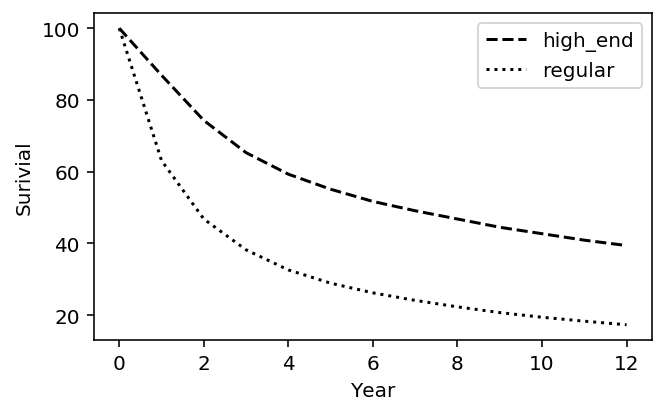

In [167]:
plt.figure(figsize=(5,3))
plt.plot(data['year'], data['high_end'], 'k-', label='high_end',linestyle='dashed')
plt.plot(data['year'], data['regular'], 'k-', label='regular',linestyle='dotted')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Surivial')



In [328]:
def exp(t, a, b):
    return 100 * np.exp(-b*t)

def exp_const(t, a, b, c):
    return a + (b * np.exp(-c*t))
    
def exp_const_2(t, a, b, c, d):
    return (a * np.exp((-c*(t**d)) + (b*t)))

def beta_geometric(t, a, b):
#     return 100*theta*(1- (theta**(t-1)))
    return 100 * beta(a, b+t) /  beta(a, b)

def weibull(t, a, p):
    return 100*np.exp(-((a*(t))**p))

# θ(1 − θ)
# t−1 

# -c*t
            
            
# (ct + b)t
# ct**2 + bt


In [321]:

def fit_func(func, x_col, y_col, max_year=12):
    popt, pcov = curve_fit(func, data[x_col][:(max_year+1)], data[y_col][:(max_year+1)],maxfev=5000)
    preds = func(data[x_col], *popt)
    print(pcov)
    return preds

In [322]:
# fit_func(exp, 'year', 'high_end',8)
# fit_func(exp_const, 'year', 'high_end',)

[[inf inf]
 [inf inf]]
[[inf inf]
 [inf inf]]
[[ 2.43575069e+00 -2.01868631e+00  2.63279815e-02]
 [-2.01868631e+00  2.07838703e+00 -1.96055935e-02]
 [ 2.63279815e-02 -1.96055935e-02  3.15922486e-04]]
[[ 1.37904851e+00 -1.04988568e+00  3.41791058e-02]
 [-1.04988568e+00  3.11219347e+00 -9.02451937e-03]
 [ 3.41791058e-02 -9.02451937e-03  1.39421691e-03]]
[[0.01131889 0.08218255]
 [0.08218255 0.60339425]]
[[0.00036331 0.00085843]
 [0.00085843 0.00210733]]
[[3.96923335e-05 2.76548421e-04]
 [2.76548421e-04 2.53048690e-03]]
[[ 6.60636447e-05 -6.63694676e-06]
 [-6.63694676e-06  7.36149083e-04]]


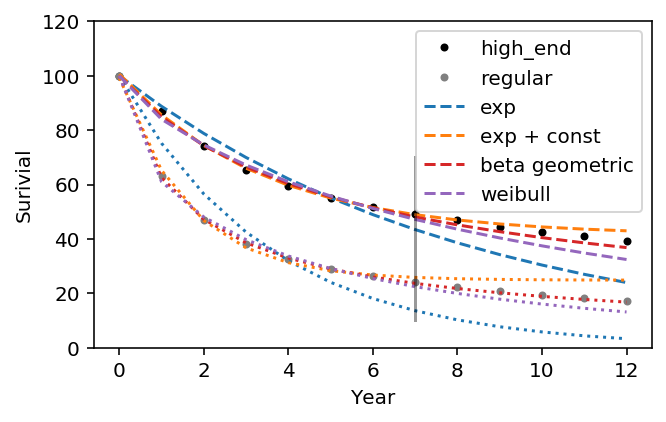

In [335]:
plt.figure(figsize=(5,3))
max_year = 7
# Raw data
plt.plot(data['year'], data['high_end'], 'k.', label='high_end')
plt.plot(data['year'], data['regular'], 'k.', label='regular',color='gray')
# Exponential
plt.plot(fit_func(exp, 'year', 'high_end',max_year), color='C0', label='exp',linestyle='dashed')
plt.plot(fit_func(exp, 'year', 'regular',max_year), color='C0',linestyle='dotted')
# Exponential
plt.plot(fit_func(exp_const, 'year', 'high_end',max_year), color='C1', label='exp + const',linestyle='dashed')
plt.plot(fit_func(exp_const, 'year', 'regular',max_year), color='C1',linestyle='dotted')
# Exponential
# plt.plot(fit_func(exp_const_2, 'year', 'high_end',max_year), color='C2', label='exp + changing hazard',linestyle='dashed')
# plt.plot(fit_func(exp_const_2, 'year', 'regular',max_year), color='C2',linestyle='dotted')
# Beta Geometric
plt.plot(fit_func(beta_geometric, 'year', 'high_end',max_year), color='C3', label='beta geometric',linestyle='dashed')
plt.plot(fit_func(beta_geometric, 'year', 'regular',max_year), color='C3',linestyle='dotted')
# weibull
plt.plot(fit_func(weibull, 'year', 'high_end',max_year), color='C4', label='weibull',linestyle='dashed')
plt.plot(fit_func(weibull, 'year', 'regular',max_year), color='C4',linestyle='dotted')




beta_geometric


plt.legend()
plt.xlabel('Year')
plt.ylabel('Surivial')
plt.ylim([0,120])
plt.plot([7,7],[10,70], color = 'k', alpha = 0.4)

In [298]:
Having read the paper, I think this makes a lot of sense for the univariate approach, and the logic behind the 



Well I think whatever method we choose, our survival curves should match up with the kaplem-mier curves, as that is essentually telling us how well the model fits retention


I think regardless of the method, we probably shouldn't be assuming a constant hazard (i.e. exponential), as we know this isn't true for economist users


So that means either using:

A univariate approach which allows retention rate to increase with time (of which beta-. seems like a decent choice)
Some kind of multivariate approach (e.g. cox proportional hazards), with a hazard function that varies with t, and can be extrapolated forwards


The advantage of the latter, would be that if for some paraameter e.g. free trial, new marketing channel, we don't yet know the shape of the hazard function, we can add these features as parameters in the model, and the shape of the hazard function 





Im not sure if there's a way to 




(perhaps AFT could be used similarly - I haven't looked at this kind of model)


I guess the disadvantage is that we can't apply a multivariate approach. But I think regardless of the method, we probably shouldn't be assuming a constant hazard (i.e. constant retention rate)



Another option, would be to use cox proportional hazards or AFT, both of which I guess deftault, and to define some kind of parameterised hazard function




(or AFT)
Ideally, we want a hazard function that we can extrapolate forwards in time ()
                                                                                                                             
                                                                                                                             
                                                                                                                             
                                                                                                                             
                                                                                                                             

SyntaxError: invalid syntax (<ipython-input-298-6012a8df37df>, line 1)